In [2]:
import numpy as np
data = np.load('../Dataset/pathmnist.npz')
data_train = data['train_images']
data_test = data['test_images']
data_val = data['val_images']
label_train = data['train_labels']
label_test = data['test_labels']
label_val = data['val_labels']
print(len(data_train))
print(len(data_test))

89996
7180


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Flatten the images and normalize pixel values

n_samples = len(data_train)
data_temp = data_train.reshape((n_samples, -1))
data_tr = StandardScaler().fit_transform(data_temp)

n_samples = len(data_test)
data_temp = data_test.reshape((n_samples, -1))
data_te = StandardScaler().fit_transform(data_temp)
n_samples = len(data_val)
data_temp = data_val.reshape((n_samples, -1))
data_va = StandardScaler().fit_transform(data_temp)

In [1]:
# Tried kernals and regularization parameters
kernels = {'rbf'}
C = {1}
# Initialize an empty dictionary to store results
accuracy_results = {'kernel': [], 'C': [], 'accu': []}

In [6]:
# trying different svm kernals with different regularization parameters
for i in kernels:
    for c in C:
        # Create an SVM classifier
        clf_svm = SVC(kernel= i , C = c)

        # Train the classifier
        clf_svm.fit(data_tr, label_train)

        # Make predictions on the test set
        y_pred = clf_svm.predict(data_te)

        # Evaluate the performance
        accu_svm = accuracy_score(label_test, y_pred)

        # storing performance values for plotting

        accuracy_results['kernel'].append(i)
        accuracy_results['C'].append(c)
        accuracy_results['accu'].append(accu_svm)

        # Display classification report
        print(f'Report for SVM with {i} kernal and regularization parameter = {c}:')
        print(classification_report(label_test, y_pred))

c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Report for SVM with rbf kernal and regularization parameter = 1:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1338
           1       0.89      1.00      0.94       847
           2       0.36      0.65      0.46       339
           3       0.58      0.29      0.38       634
           4       0.94      0.66      0.77      1035
           5       0.45      0.48      0.47       592
           6       0.32      0.18      0.23       741
           7       0.68      0.40      0.50       421
           8       0.55      0.88      0.68      1233

    accuracy                           0.67      7180
   macro avg       0.63      0.61      0.60      7180
weighted avg       0.69      0.67      0.66      7180



In [13]:
# Apply random sample and mini-batch for training, as the training data set is massive

# Parameters
num_batch = 200
batch_size = 10000
batch_index = []

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [50]:
# Perform mini-batch updates
if len(batch_index) != 0:
    print(f'{len(batch_index)} batches already exists, please check')
else:
    for i in range(num_batch):
        # Randomly sample a mini-batch from the training set
        batch_index.append(np.random.choice(len(data_tr), size=batch_size, replace=False))


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create an empty Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42, warm_start= True)

# Perform mini-batch updates
for i in range(num_batch):
    # use the randomly sampled indices for mini-batches
    data_batch = [data_tr[j] for j in batch_index[i]]
    label_batch = [label_train[j] for j in batch_index[i]]

    # Train the Random Forest classifier on the current mini-batch
    rf_classifier.fit(data_batch, label_batch)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(data_te)

# Evaluate accuracy on the test set
accuracy = accuracy_score(label_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.5811977715877438


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create an empty Random Forest classifier
rf_classifier_2 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_classifier_2.fit(data_tr, label_train)


c:\Users\zhujy\.conda\envs\ALMS\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.5139275766016713


In [34]:

# Make predictions on the test set
rf_predictions2 = rf_classifier_2.predict(data_te)

# Evaluate accuracy on the test set
accuracy = accuracy_score(label_test, rf_predictions2)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.6497214484679665


In [3]:
from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
label_train_one_hot = to_categorical(label_train, num_classes=9)
label_valid_one_hot = to_categorical(label_val, num_classes=9)
label_test_one_hot = to_categorical(label_test, num_classes=9)


In [23]:
import tensorflow as tf
import tensorflow.keras as Keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# # Data augmentation for the training set
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # No augmentation for the validation set
# valid_datagen = ImageDataGenerator(rescale=1./255)

# Pad all images to the maximum dimensions
data_train_padded = np.array([np.pad(img, ((2, 2), (2, 2), (0, 0)), mode='constant') for img in data_train])
data_valid_padded = np.array([np.pad(img, ((2, 2), (2, 2), (0, 0)), mode='constant') for img in data_val])
data_test_padded = np.array([np.pad(img, ((2, 2), (2, 2), (0, 0)), mode='constant') for img in data_test])

data_train_res = Keras.applications.resnet50.preprocess_input(data_train)
data_valid_res = Keras.applications.resnet50.preprocess_input(data_val)
data_test_res = Keras.applications.resnet50.preprocess_input(data_test)

data_train_respad = Keras.applications.resnet50.preprocess_input(data_train_padded)
data_valid_respad = Keras.applications.resnet50.preprocess_input(data_valid_padded)
data_test_respad = Keras.applications.resnet50.preprocess_input(data_test_padded)

In [8]:
# Recommended resnet inputsize is (224,224)
res_size = (224,224)
input_t = Keras.Input(shape=(28, 28, 3))

# Load ResNet-50 pre-trained on ImageNet
resnet_model = Keras.applications.ResNet50(include_top=False,
                                    weights="imagenet"
                                    )

# Freeze the convolutional layers
for layer in resnet_model.layers:
    layer.trainable = False

# Add classification head
model_B = Keras.models.Sequential()
model_B.add(Keras.layers.Lambda(lambda image: tf.image.resize(image, res_size))) 
model_B.add(resnet_model)
model_B.add(Keras.layers.Flatten())
model_B.add(Keras.layers.BatchNormalization())
model_B.add(Keras.layers.Dense(256, activation='relu'))
model_B.add(Keras.layers.Dropout(0.5))
model_B.add(Keras.layers.BatchNormalization())
model_B.add(Keras.layers.Dense(128, activation='relu'))
model_B.add(Keras.layers.Dropout(0.5))
model_B.add(Keras.layers.BatchNormalization())
model_B.add(Keras.layers.Dense(64, activation='relu'))
model_B.add(Keras.layers.Dropout(0.5))
model_B.add(Keras.layers.BatchNormalization())
model_B.add(Keras.layers.Dense(9, activation='softmax'))

# Compile the model
#model_B.compile(optimizer=Keras.optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_B.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model_B.summary()

# Define EarlyStopping callback, to perfent overfit
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [14]:
result_B = model_B.fit(
    data_train_res, label_train_one_hot,
    epochs= num_batch,
    batch_size = 32,
    verbose=1,
    validation_data=(data_valid_res,label_valid_one_hot),
    callbacks = [early_stopping]
)

Epoch 1/200
2813/2813 [==============================] - 1857s 659ms/step - loss: 0.7806 - accuracy: 0.7411 - val_loss: 0.3417 - val_accuracy: 0.8845
Epoch 2/200
2813/2813 [==============================] - 1825s 649ms/step - loss: 0.4985 - accuracy: 0.8402 - val_loss: 0.2989 - val_accuracy: 0.9018
Epoch 3/200
2813/2813 [==============================] - 1821s 648ms/step - loss: 0.4170 - accuracy: 0.8683 - val_loss: 0.2884 - val_accuracy: 0.9061
Epoch 4/200
2813/2813 [==============================] - 1821s 647ms/step - loss: 0.3669 - accuracy: 0.8851 - val_loss: 0.2704 - val_accuracy: 0.9107
Epoch 5/200
2813/2813 [==============================] - 1822s 648ms/step - loss: 0.3235 - accuracy: 0.8992 - val_loss: 0.2660 - val_accuracy: 0.9129
Epoch 6/200
2813/2813 [==============================] - 28167s 10s/step - loss: 0.2922 - accuracy: 0.9082 - val_loss: 0.2863 - val_accuracy: 0.9084
Epoch 7/200
2813/2813 [==============================] - 2274s 809ms/step - loss: 0.2612 - accuracy: 

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_B.evaluate(data_test_res, label_test_one_hot)
print(f"test accuracy is now {test_accuracy}")

225/225 [==============================] - 111s 491ms/step - loss: 0.4148 - accuracy: 0.8820
test accuracy is now 0.8820334076881409


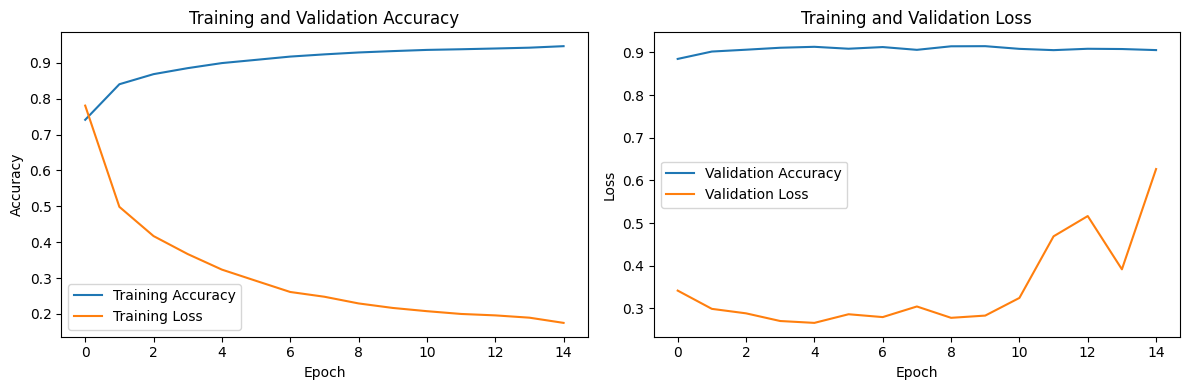

In [16]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(result_B.history['accuracy'], label='Training Accuracy')
plt.plot(result_B.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(result_B.history['val_accuracy'], label='Validation Accuracy')
plt.plot(result_B.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
print(model_B.summary())

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (Batch  (None, 100352)            401408    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_nor

In [17]:
try:
    model_B.save(filepath= '../B/my_saved_model')
    print('Saving model; Success')
except:
    print('Saving model failed')

INFO:tensorflow:Assets written to: ../B/my_saved_model\assets


INFO:tensorflow:Assets written to: ../B/my_saved_model\assets


Saving model; Success


In [18]:
from tensorflow.keras.models import load_model
model_reload = load_model(filepath= '../B/my_saved_model')


In [19]:

test_loss, test_accuracy = model_reload.evaluate(data_test_res, label_test_one_hot)
print(f"test accuracy is now {test_accuracy}")

 54/225 [======>.......................] - ETA: 1:28 - loss: 0.4221 - accuracy: 0.8802

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Distribution check

df = pd.DataFrame(label_test)

# Display the count of each category
df.head()
category_counts = df[0].value_counts()
print(category_counts)

In [32]:
# Another instantiation, with no resizing
res_size2 = (28,28)
input_t = Keras.Input(shape=(28, 28, 3))

# Load ResNet-50 pre-trained on ImageNet
resnet_model = Keras.applications.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor = input_t
                                    )

# Freeze the convolutional layers
for layer in resnet_model.layers:
    layer.trainable = False

# Add classification head
model_B2 = Keras.models.Sequential()
#model_B.add(Keras.layers.Lambda(lambda image: tf.image.resize(image, res_size2))) 
model_B2.add(resnet_model)
model_B2.add(Keras.layers.Flatten())
model_B2.add(Keras.layers.BatchNormalization())
model_B2.add(Keras.layers.Dense(256, activation='relu'))
model_B2.add(Keras.layers.Dropout(0.5))
model_B2.add(Keras.layers.BatchNormalization())
model_B2.add(Keras.layers.Dense(128, activation='relu'))
model_B2.add(Keras.layers.Dropout(0.5))
model_B2.add(Keras.layers.BatchNormalization())
model_B2.add(Keras.layers.Dense(64, activation='relu'))
model_B2.add(Keras.layers.Dropout(0.5))
model_B2.add(Keras.layers.BatchNormalization())
model_B2.add(Keras.layers.Dense(9, activation='softmax'))

# Compile the model
#model_B.compile(optimizer=Keras.optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_B2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define EarlyStopping callback, to perfent overfit
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [33]:
result_B2 = model_B2.fit(
    data_train_res, label_train_one_hot,
    epochs= num_batch,
    batch_size = 32,
    verbose=1,
    validation_data=(data_valid_res,label_valid_one_hot),
    callbacks = [early_stopping]
)

Epoch 1/200
2813/2813 [==============================] - 136s 47ms/step - loss: 1.0787 - accuracy: 0.6264 - val_loss: 0.6421 - val_accuracy: 0.7780
Epoch 2/200
2813/2813 [==============================] - 131s 46ms/step - loss: 0.8227 - accuracy: 0.7201 - val_loss: 0.5888 - val_accuracy: 0.7943
Epoch 3/200
2813/2813 [==============================] - 131s 47ms/step - loss: 0.7764 - accuracy: 0.7382 - val_loss: 0.5751 - val_accuracy: 0.7979
Epoch 4/200
2813/2813 [==============================] - 133s 47ms/step - loss: 0.7445 - accuracy: 0.7485 - val_loss: 0.5490 - val_accuracy: 0.8058
Epoch 5/200
2813/2813 [==============================] - 130s 46ms/step - loss: 0.7217 - accuracy: 0.7568 - val_loss: 0.5471 - val_accuracy: 0.8110
Epoch 6/200
2813/2813 [==============================] - 130s 46ms/step - loss: 0.6940 - accuracy: 0.7620 - val_loss: 0.5352 - val_accuracy: 0.8094
Epoch 7/200
2813/2813 [==============================] - 129s 46ms/step - loss: 0.6881 - accuracy: 0.7671 - val_

In [34]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_B2.evaluate(data_test_res, label_test_one_hot)
print(f"test accuracy is now {test_accuracy}")

225/225 [==============================] - 8s 37ms/step - loss: 0.6814 - accuracy: 0.7798
test accuracy is now 0.7798050045967102
